In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print("Any Null Values ::",df.isnull().values.any())

Any Null Values :: False


In [3]:
columns = df.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

X = df[columns]
Y = df["Class"]

print("Input Data Dimension :: ",X.shape)
print("Output Label Dimension :: ",Y.shape)

Input Data Dimension ::  (284807, 30)
Output Label Dimension ::  (284807,)


In [4]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

print("Percentage of Normal Transaction ::",round(normal.shape[0]/df.shape[0],3)*100,"%")
print("Percentage of Fraud Transaction ::",round(fraud.shape[0]/df.shape[0],5)*100,"%")

Percentage of Normal Transaction :: 99.8 %
Percentage of Fraud Transaction :: 0.173 %


Only 492 (or 0.173%) of transaction are fraudulent. Hence the data is highly unbalanced with respect with target variable Class.

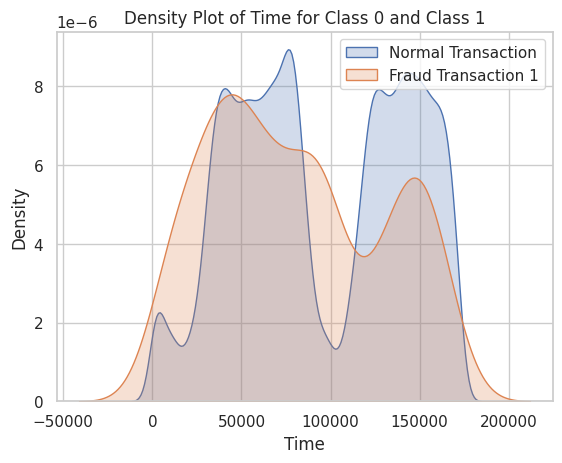

In [5]:
time_normal = df[df['Class']==0]["Time"]

time_fraud = df[df['Class']==1]["Time"]

sns.set(style="whitegrid")

# Plotting density plot for Class 0
sns.kdeplot(data=time_normal, label='Normal Transaction', fill=True)

# Plotting density plot for Class 1
sns.kdeplot(data=time_fraud, label='Fraud Transaction 1', fill=True)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density Plot of Time for Class 0 and Class 1')

# Display the plot
plt.legend()
plt.show()

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.